### Grain size distribution for each Yerba Mate granulometry

In [6]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

df_1 = pd.read_csv('coarse\dimensions_YM2_gruesa_297x210.jpg.csv')
df_2 = pd.read_csv('medium\dimensions_YM2_medium_297x210.jpg.csv')
df_3 = pd.read_csv('fine\dimensions_YM2_fine_297x210.jpg.csv')
df_4 = pd.read_csv('extrafine\dimensions_YM2_extrafine_200x150.jpg.csv')

df_tot = pd.concat([df_1, df_2, df_3, df_4])
df_tot


,length,width,granulometry
0,1.100478,6.538462,coarse
1,3.062201,3.942308,coarse
2,4.114833,6.442308,coarse
3,3.444976,5.288462,coarse
4,3.014354,3.557692,coarse
...,...,...,...
3057,0.975610,0.685484,extrafine
3058,0.731707,0.604839,extrafine
3059,0.569106,0.967742,extrafine
3060,1.138211,0.766129,extrafine


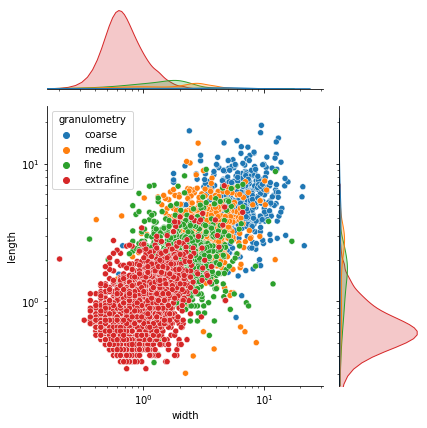

In [12]:
sns.jointplot(data=df_tot, x='width', y='length', hue='granulometry', kind='scatter', ratio=3, marginal_kws={})
#plt.xlim(0, 16)
#plt.ylim(0, 16)
plt.yscale('log')
plt.xscale('log')
plt.show()

In [ ]:
df_tot[df_tot['granulometry']=='coarse']['length']

0      0.000106
1      0.000294
2      0.000395
3      0.000330
4      0.000289
         ...   
599    0.000395
600    0.001376
601    0.000528
602    0.000941
603    0.000541
Name: length, Length: 604, dtype: float64